# Notación Científica en Matplotlib

Este notebook explica por qué Matplotlib usa notación científica por defecto y cómo controlarla.

## 1. ¿Por qué Matplotlib usa notación científica?

Matplotlib usa notación científica automáticamente cuando:
- Los valores son muy grandes (mayores a 10,000)
- Los valores son muy pequeños (menores a 0.0001)
- Hay un offset común entre valores (ej: 1000000, 1000001, 1000002)

Esto ayuda a mantener las etiquetas de los ejes legibles y evita números muy largos.

In [2]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np

## 2. Ejemplo con números grandes (Notación científica automática)

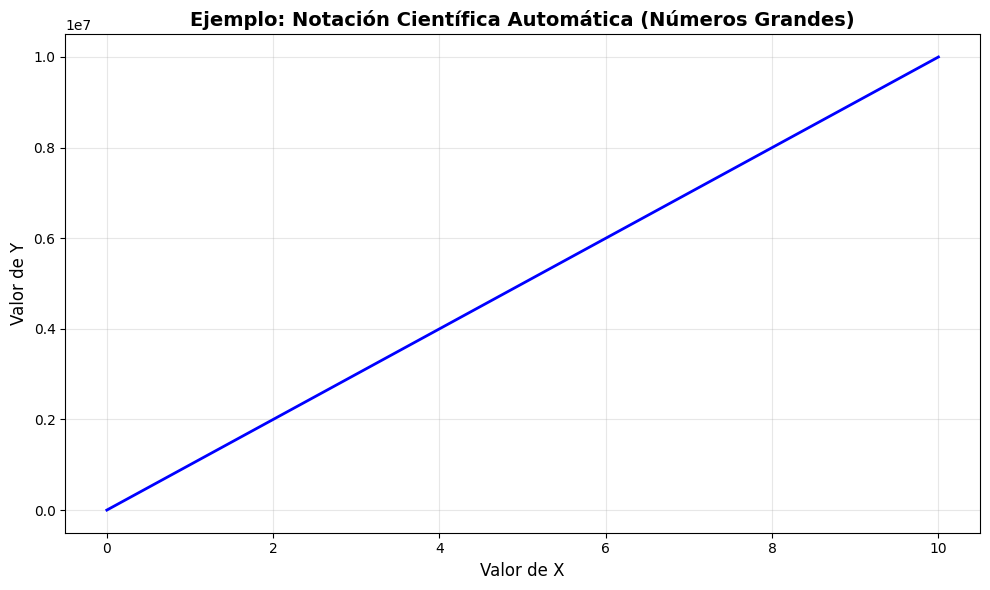

In [3]:
# Crear datos con números muy grandes
x = np.linspace(0, 10, 100)  # 100 puntos entre 0 y 10
y = x * 1000000  # Multiplicar por un millón

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar los datos
plt.plot(x, y, linewidth=2, color='blue')

# Añadir título y etiquetas
plt.title('Ejemplo: Notación Científica Automática (Números Grandes)', fontsize=14, fontweight='bold')
plt.xlabel('Valor de X', fontsize=12)
plt.ylabel('Valor de Y', fontsize=12)

# Añadir grid para mejor visualización
plt.grid(True, alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Nota: Observa cómo el eje Y muestra "1e7" arriba, lo que significa "×10^7"

## 3. Ejemplo con números pequeños (Notación científica automática)

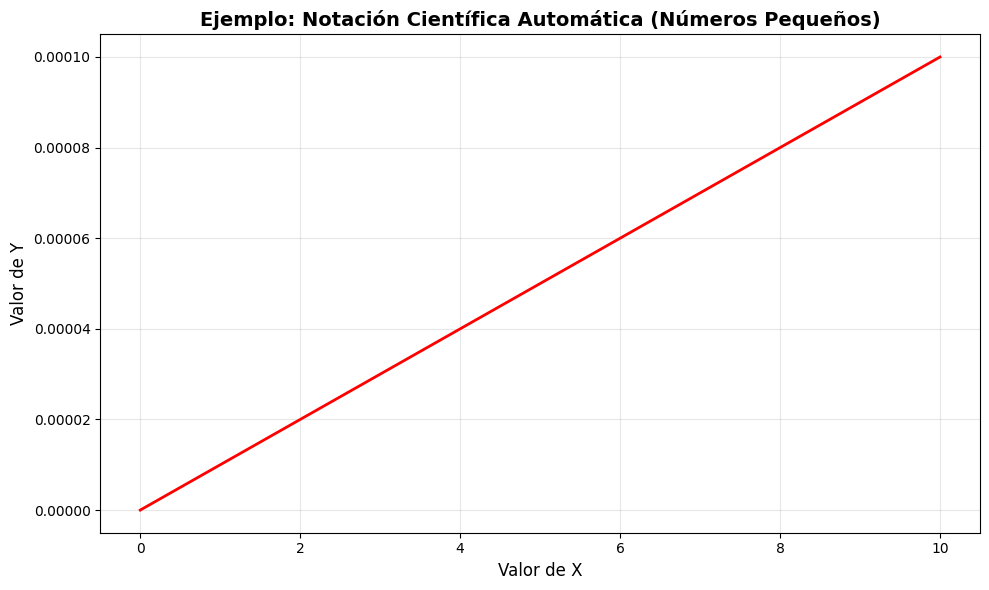

In [4]:
# Crear datos con números muy pequeños
x = np.linspace(0, 10, 100)  # 100 puntos entre 0 y 10
y = x * 0.00001  # Multiplicar por 0.00001

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar los datos
plt.plot(x, y, linewidth=2, color='red')

# Añadir título y etiquetas
plt.title('Ejemplo: Notación Científica Automática (Números Pequeños)', fontsize=14, fontweight='bold')
plt.xlabel('Valor de X', fontsize=12)
plt.ylabel('Valor de Y', fontsize=12)

# Añadir grid
plt.grid(True, alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Nota: El eje Y muestra "1e-4" que significa "×10^-4"

## 4. Método 1: Desactivar notación científica usando `ticklabel_format()`

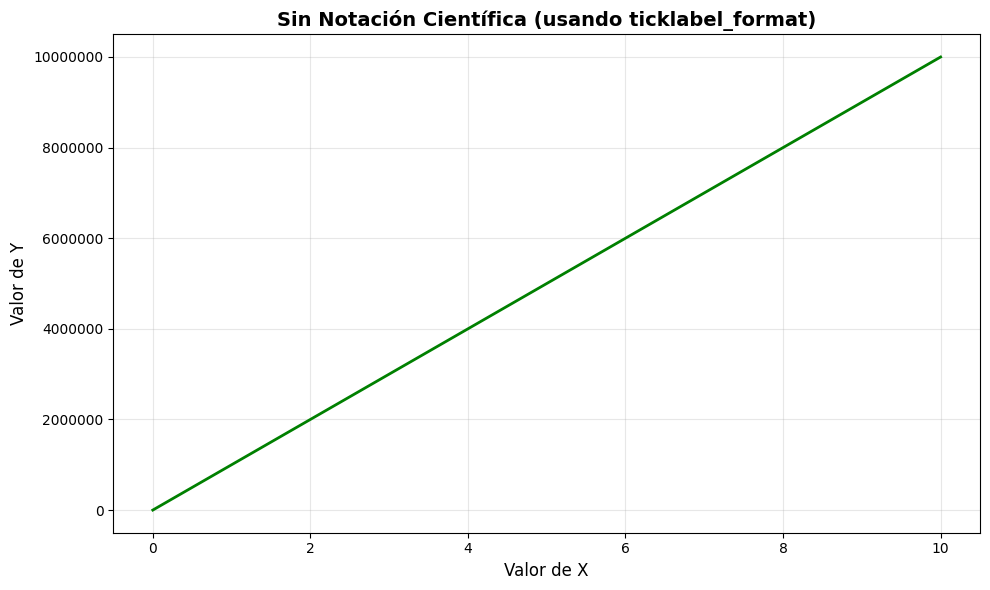

In [5]:
# Crear datos con números grandes
x = np.linspace(0, 10, 100)
y = x * 1000000

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar
plt.plot(x, y, linewidth=2, color='green')

# DESACTIVAR notación científica en el eje Y
# style='plain' indica que use notación normal (no científica)
plt.ticklabel_format(axis='y', style='plain')

# Añadir título y etiquetas
plt.title('Sin Notación Científica (usando ticklabel_format)', fontsize=14, fontweight='bold')
plt.xlabel('Valor de X', fontsize=12)
plt.ylabel('Valor de Y', fontsize=12)

# Añadir grid
plt.grid(True, alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Nota: Ahora verás los números completos como 10000000 en lugar de 1e7

## 5. Método 2: Usar un formateador personalizado con `FuncFormatter`

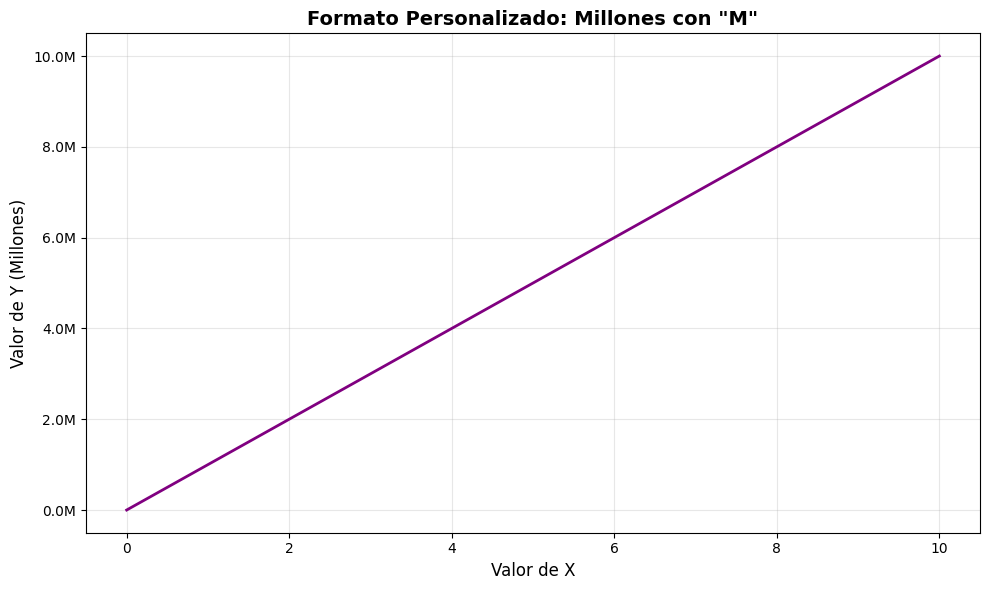

In [6]:
# Importar el módulo ticker para formateadores personalizados
from matplotlib.ticker import FuncFormatter

# Definir una función para formatear los números
# Esta función se ejecutará para cada etiqueta del eje
def formato_millones(valor, pos):
    """Formatea los valores en millones con 'M'"""
    # 'valor' es el número a formatear
    # 'pos' es la posición (no la usamos pero es requerida)
    return f'{valor/1e6:.1f}M'  # Divide por 1 millón y añade 'M'

# Crear datos
x = np.linspace(0, 10, 100)
y = x * 1000000

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar
ax.plot(x, y, linewidth=2, color='purple')

# Aplicar el formateador personalizado al eje Y
# FuncFormatter toma nuestra función y la aplica a cada etiqueta
ax.yaxis.set_major_formatter(FuncFormatter(formato_millones))

# Añadir título y etiquetas
ax.set_title('Formato Personalizado: Millones con "M"', fontsize=14, fontweight='bold')
ax.set_xlabel('Valor de X', fontsize=12)
ax.set_ylabel('Valor de Y (Millones)', fontsize=12)

# Añadir grid
ax.grid(True, alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Nota: Ahora verás "10.0M" en lugar de "1e7"

## 6. Método 3: Usar `StrMethodFormatter` para formato simple

In [ ]:
# Importar StrMethodFormatter
from matplotlib.ticker import StrMethodFormatter

# Crear datos
x = np.linspace(0, 10, 100)
y = x * 1000000

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar
ax.plot(x, y, linewidth=2, color='orange')

# Usar StrMethodFormatter para mostrar números sin decimales
# '{x:.0f}' significa: mostrar x sin decimales (.0f)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Añadir título y etiquetas
ax.set_title('Formato usando StrMethodFormatter', fontsize=14, fontweight='bold')
ax.set_xlabel('Valor de X', fontsize=12)
ax.set_ylabel('Valor de Y', fontsize=12)

# Añadir grid
ax.grid(True, alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## 7. Método 4: Usar `ScalarFormatter` con control total

In [ ]:
# Importar ScalarFormatter
from matplotlib.ticker import ScalarFormatter

# Crear datos
x = np.linspace(0, 10, 100)
y = x * 1000000

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar
ax.plot(x, y, linewidth=2, color='brown')

# Crear un ScalarFormatter
formatter = ScalarFormatter()

# Configurar para NO usar notación científica
# useOffset=False: no usar offset (ej: +1e6)
formatter.set_scientific(False)

# Aplicar el formateador al eje Y
ax.yaxis.set_major_formatter(formatter)

# Añadir título y etiquetas
ax.set_title('Usando ScalarFormatter sin notación científica', fontsize=14, fontweight='bold')
ax.set_xlabel('Valor de X', fontsize=12)
ax.set_ylabel('Valor de Y', fontsize=12)

# Añadir grid
ax.grid(True, alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## 8. Comparación lado a lado: Con y Sin notación científica

In [ ]:
# Crear datos
x = np.linspace(0, 10, 100)
y = x * 1000000

# Crear figura con 2 subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- SUBPLOT 1: CON notación científica (por defecto) ---
ax1.plot(x, y, linewidth=2, color='blue')
ax1.set_title('CON Notación Científica (Por Defecto)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Valor de X', fontsize=10)
ax1.set_ylabel('Valor de Y', fontsize=10)
ax1.grid(True, alpha=0.3)

# --- SUBPLOT 2: SIN notación científica ---
ax2.plot(x, y, linewidth=2, color='green')
# Desactivar notación científica
ax2.ticklabel_format(axis='y', style='plain')
ax2.set_title('SIN Notación Científica', fontsize=12, fontweight='bold')
ax2.set_xlabel('Valor de X', fontsize=10)
ax2.set_ylabel('Valor de Y', fontsize=10)
ax2.grid(True, alpha=0.3)

# Ajustar el layout para que no se solapen
plt.tight_layout()
plt.show()

# Nota: Compara cómo se muestran los números en ambos gráficos

## 9. Ejemplo práctico: Datos financieros

In [ ]:
# Importar FuncFormatter para formato personalizado
from matplotlib.ticker import FuncFormatter

# Simular datos de ventas mensuales (en dólares)
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ventas = [1200000, 1350000, 1500000, 1800000, 2100000, 2300000, 
          2500000, 2200000, 2400000, 2600000, 2900000, 3200000]

# Función para formatear en miles de dólares
def formato_dolares(valor, pos):
    """Formatea valores como '$X.XM'"""
    return f'${valor/1e6:.1f}M'

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crear gráfico de barras
barras = ax.bar(meses, ventas, color='steelblue', alpha=0.8, edgecolor='black')

# Aplicar formato personalizado al eje Y
ax.yaxis.set_major_formatter(FuncFormatter(formato_dolares))

# Añadir título y etiquetas
ax.set_title('Ventas Mensuales 2024 - Formato Personalizado', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Mes', fontsize=12, fontweight='bold')
ax.set_ylabel('Ventas', fontsize=12, fontweight='bold')

# Añadir grid solo en el eje Y
ax.grid(True, axis='y', alpha=0.3, linestyle='--')

# Añadir valores sobre cada barra
for barra in barras:
    altura = barra.get_height()
    # Colocar texto sobre cada barra
    ax.text(barra.get_x() + barra.get_width()/2., altura,
            f'${altura/1e6:.1f}M',  # Formato del texto
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Ajustar layout
plt.tight_layout()
plt.show()

## 10. Resumen de métodos

### Tabla resumen de métodos para controlar la notación científica:

| Método | Código | Uso recomendado |
|--------|--------|------------------|
| **ticklabel_format()** | `plt.ticklabel_format(style='plain')` | Desactivar rápidamente la notación científica |
| **FuncFormatter** | `FuncFormatter(funcion_personalizada)` | Formato completamente personalizado |
| **StrMethodFormatter** | `StrMethodFormatter('{x:.0f}')` | Formato simple con string format |
| **ScalarFormatter** | `ScalarFormatter().set_scientific(False)` | Control detallado del formato |

### ¿Cuál usar?

- **Simple y rápido**: `ticklabel_format(style='plain')`
- **Formato personalizado** (ej: añadir $, M, K): `FuncFormatter()`
- **Control de decimales simple**: `StrMethodFormatter()`
- **Control total**: `ScalarFormatter()`

## 11. Ejercicio práctico

In [ ]:
# EJERCICIO: Modifica este código para mostrar las etiquetas del eje Y
# en formato de miles con 'K' (ej: 50K en lugar de 50000)

# Datos de ejemplo
x = np.arange(1, 11)
y = x * 10000  # Valores en decenas de miles

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, marker='o', linewidth=2, markersize=8, color='crimson')

# TODO: Añade aquí el formateador para mostrar valores como '50K', '100K', etc.
# Pista: Usa FuncFormatter y divide por 1000

ax.set_title('Ejercicio: Formatea el eje Y con "K"', fontsize=14, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Solución del ejercicio

In [ ]:
# SOLUCIÓN del ejercicio anterior

from matplotlib.ticker import FuncFormatter

# Función para formatear en miles
def formato_miles(valor, pos):
    """Formatea los valores en miles con 'K'"""
    return f'{valor/1e3:.0f}K'

# Datos
x = np.arange(1, 11)
y = x * 10000

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, marker='o', linewidth=2, markersize=8, color='crimson')

# Aplicar el formateador
ax.yaxis.set_major_formatter(FuncFormatter(formato_miles))

ax.set_title('Solución: Valores formateados con "K"', fontsize=14, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y (Miles)', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Conclusión

Matplotlib usa notación científica para mantener los gráficos legibles cuando los valores son muy grandes o muy pequeños. Sin embargo, tenemos varios métodos para controlar este comportamiento según nuestras necesidades:

1. **Desactivar completamente** la notación científica
2. **Personalizar el formato** usando formateadores
3. **Adaptarlo** a contextos específicos (financiero, científico, etc.)

Recuerda elegir el método que mejor se adapte a tu caso de uso y a tu audiencia.